필수과제2
- 데이터를 제공할 예정
- 해당 데이터를 가지고 기존에 배웠던, OLS~ 변수에 대한 설명력 이해 이런 부분 에다가 추가로 오늘 배운 내용까지해서 최적의 모델링, alpha 값 까지 찾아서 정리해서 제출해 주세요!

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn import datasets

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dbt=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/물류데이터.csv')
dbt=dbt.drop(['index'],axis=1,inplace=False)
dbt

,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수
0,5011000595017300,2871000192069300,음반,3
1,4148000690043300,5011000264024400,문화컨텐츠,3
2,5011000078068400,1120000007005400,농산물,3
3,4127100048006400,5011000587019400,기타식품,7
4,5011000078068400,2823700010076300,농산물,3
...,...,...,...,...
31679,4471000290087200,5011000213073200,스포츠잡화,3
31680,1129000014045300,5011000319087100,스마트디바이스,4
31681,1129000014045300,5011000263065200,스마트디바이스,6
31682,4127300065073100,5011000264061200,지갑,7


In [5]:
dbt.columns=['num1','num2','category','waybill_num']
dbt

,num1,num2,category,waybill_num
0,5011000595017300,2871000192069300,음반,3
1,4148000690043300,5011000264024400,문화컨텐츠,3
2,5011000078068400,1120000007005400,농산물,3
3,4127100048006400,5011000587019400,기타식품,7
4,5011000078068400,2823700010076300,농산물,3
...,...,...,...,...
31679,4471000290087200,5011000213073200,스포츠잡화,3
31680,1129000014045300,5011000319087100,스마트디바이스,4
31681,1129000014045300,5011000263065200,스마트디바이스,6
31682,4127300065073100,5011000264061200,지갑,7


In [6]:
dbt.category.value_counts()

농산물              20321
문화컨텐츠             1091
음료                1034
수산                 860
가공식품               846
                 ...  
유아가구                 4
기타출산/육아              4
태블릿PC/노트북액세서리        4
선케어                  4
스포츠잡화                4
Name: category, Length: 100, dtype: int64

In [12]:
dbt.num1.value_counts()

5011000078068400    3882
5013000610049100    1790
5013000731055200    1235
5011000137030100    1137
5013000821028200     731
                    ... 
4511300030055300       1
4719000321023400       1
4423000423020300       1
4711300748080100       1
2811000139076100       1
Name: num1, Length: 4229, dtype: int64

In [14]:
dbt.waybill_num.value_counts()

3      17565
4       6065
5       2928
6       1368
7        761
       ...  
77         1
108        1
211        1
130        1
89         1
Name: waybill_num, Length: 100, dtype: int64

## 라벨 인코딩

In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
dbt[['category']] = dbt[['category']].apply(lambda x: encoder.fit_transform(x))
dbt

,num1,num2,category,waybill_num
0,5011000595017300,2871000192069300,67,3
1,4148000690043300,5011000264024400,34,3
2,5011000078068400,1120000007005400,27,3
3,4127100048006400,5011000587019400,17,7
4,5011000078068400,2823700010076300,27,3
...,...,...,...,...
31679,4471000290087200,5011000213073200,55,3
31680,1129000014045300,5011000319087100,52,4
31681,1129000014045300,5011000263065200,52,6
31682,4127300065073100,5011000264061200,79,7


In [17]:
dbt.dtypes

num1           int64
num2           int64
category       int64
waybill_num    int64
dtype: object

## 변수 간 관계를 그래프로 보이기

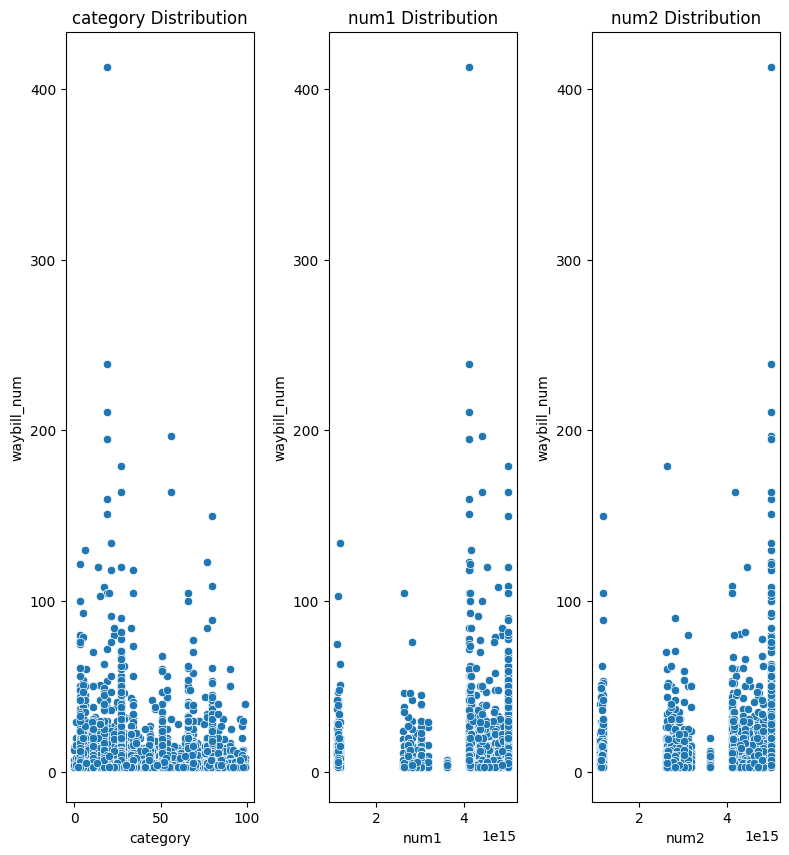

In [22]:
import matplotlib.gridspec as gridspec #서브 플롯들을 그리드 객체로 배치
import seaborn as sns

grid = gridspec.GridSpec(1,5) #1행 5열
plt.figure(figsize=(16,10))
plt.subplots_adjust(wspace= 0.4, hspace= 0.5) #서브 플롯들 간의 간격 조정


dis_feature = ['category', 'num1', 'num2'] #타깃만 분리

for idx, feature in enumerate(dis_feature): #변수들과 타깃간의 선형적인 관계를 찾기위한 그래프
    ax = plt.subplot(grid[idx])
    sns.scatterplot(x = feature,
                   y='waybill_num',
                   data= dbt,
                   ax= ax)
    ax.set_title(f'{feature} Distribution')

- 선형적인 관계가 보이지 않는다..

In [27]:
y=np.array(dbt['waybill_num'])
X=dbt.drop(['waybill_num'],axis=1,inplace=False)

X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=111)

#회귀식
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds= lr.predict(X_test)                 # 예측값
mse = mean_squared_error(y_test, y_preds)   # mse로 성능 측정
lr_rmse= np.sqrt(mse)

# 일반 cross_val
lr_neg_mse_scores = cross_val_score(lr, X_train, y_train, scoring = 'neg_mean_squared_error',cv=5)
lr_rmse_scores = np.sqrt(-1*lr_neg_mse_scores)
lr_avg_rmse = np.mean(lr_rmse_scores)

# 릿지
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_train, y_train, scoring = 'neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('선형회귀', lr_avg_rmse)
print('릿지',avg_rmse)

선형회귀 6.840290218136014
릿지 6.840264958658336


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.33472e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.29694e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.30748e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.28022e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

### alpha 파라미터값 조정

In [28]:
# alpha 파라미터값을 조정해서 바꿔보자

alphas = [0,0.1, 1, 10, 100]

# alpha 리스트 평균 rmse

for alpha in alphas:
    ridge=Ridge(alpha= alpha)
    #cross val score cv 5 RMSE
    neg_mse_scores = cross_val_score(ridge,X_train, y_train, scoring = 'neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0}일 때 5 folds의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.33472e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.29694e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.30747e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.28022e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

alpha 0일 때 5 folds의 평균 RMSE : 6.840
alpha 0.1일 때 5 folds의 평균 RMSE : 6.840
alpha 1일 때 5 folds의 평균 RMSE : 6.840
alpha 10일 때 5 folds의 평균 RMSE : 6.840
alpha 100일 때 5 folds의 평균 RMSE : 6.840


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.33474e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.29696e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.3075e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.28024e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning

- alpha값에 변화를 줘도 결과에 차이가 없다!

# 결론
- 데이터가 선형성을 띄고 있지 않아, 결과가 좋지 않은 것으로 사료된다.
- 파생데이터를 추가하는 방법도 있다. 근데 지금 상황에서 어떻게 뭘 더 추가해야하는지 잘 모르겠다.
- 따라서 규제 방식들도 크게 의미가 없어보인다.